## task:
### outflow of telecom customers analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
X = df.drop('Churn', axis=1)
y = df['Churn'].eq(True).mul(1)

In [ ]:
# dataset was prepared later, so data analysis stage was skipped

## pipeline preprocessing

In [4]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

col_transform = ['International plan', 'Voice mail plan']

def bool_transform(X):
    return X.eq('Yes').mul(1)

scaler = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
)

preprocessing = ColumnTransformer([
    ('bool_transformer', FunctionTransformer(bool_transform, feature_names_out="one-to-one"), col_transform),
    ('scaler', scaler, make_column_selector(dtype_include=np.number)),

],
remainder='drop')

### sample imbalance

In [7]:
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)

### final dataframe

In [10]:
df_scaler = pd.DataFrame(scaler, columns=preprocessing.get_feature_names_out())
df_scaler

,bool_transformer__International plan,bool_transformer__Voice mail plan,scaler__Account length,scaler__Area code,scaler__Number vmail messages,scaler__Total day minutes,scaler__Total day calls,scaler__Total day charge,scaler__Total eve minutes,scaler__Total eve calls,scaler__Total eve charge,scaler__Total night minutes,scaler__Total night calls,scaler__Total night charge,scaler__Total intl minutes,scaler__Total intl calls,scaler__Total intl charge,scaler__Customer service calls
0,0.0,0.0,-1.593637,1.716775,-0.598037,1.106456,0.975959,1.106077,1.192050,-0.598731,1.192943,0.119181,-0.619890,0.119366,-0.469414,-0.200734,-0.474021,0.346123
1,0.0,1.0,-0.668275,1.716775,1.657364,1.281702,-1.493845,1.281866,0.164365,-2.042158,0.164903,-0.399383,-1.289525,-0.398103,-0.114919,-1.013778,-0.119518,1.881306
2,0.0,0.0,-0.018020,-0.687767,-0.598037,0.571494,-0.752904,0.571114,2.527449,-1.544425,2.527307,-1.446296,-1.134994,-1.446088,-0.292166,0.205787,-0.290205,1.881306
3,0.0,1.0,0.107029,-0.687767,1.802874,0.547513,-1.592637,0.547241,-1.070436,1.989484,-1.069673,-1.565664,1.595054,-1.567846,0.133228,-0.607256,0.129947,0.346123
4,0.0,0.0,1.707655,-0.687767,-0.598037,1.600835,0.235018,1.600890,-0.847540,-0.598731,-0.846893,1.696401,0.564847,1.697866,1.267614,-0.607256,1.272233,1.113715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,0.0,1.0,-0.368157,-0.687767,1.657364,-0.227260,1.914485,-0.227532,-1.739121,0.894470,-1.738016,0.898007,1.079951,0.897745,0.700421,0.612309,0.694525,-0.421468
2329,0.0,0.0,-0.418177,1.716775,-0.598037,0.029153,1.420524,0.029640,-1.389984,0.595830,-1.389921,-0.283929,0.925420,-0.285043,-0.611212,-0.200734,-0.605318,-0.421468
2330,0.0,1.0,0.082019,-0.522749,1.075325,1.849869,1.766296,1.849382,0.381342,-0.399638,0.380722,-1.254525,0.101254,-1.254755,1.090367,-0.607256,1.088417,1.881306
2331,0.0,0.0,0.157048,-0.687767,-0.598037,-1.717775,-0.258943,-1.717398,-1.835775,-0.748051,-1.835482,0.064390,-0.671401,0.062836,1.054917,-0.607256,1.049028,-0.421468


## SVC vs Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', SVC()),
])

param_svc = {
    'classifier': [
        SVC(kernel='linear', probability=True),        
        ]}

param_lr = {
    'classifier': [
        LogisticRegression(),          
        ]}

grid_search_svc = GridSearchCV(full_pipeline, param_grid=param_svc, cv=5, scoring='roc_auc')
grid_search_lr = GridSearchCV(full_pipeline, param_grid=param_lr, cv=5, scoring='roc_auc')
model_svc = grid_search_svc.fit(X_train, y_train)
model_lr = grid_search_lr.fit(X_train, y_train)

### ROC_AUC score train

In [12]:
from sklearn.metrics import roc_auc_score

predict_test_svc = model_svc.predict_proba(X_test)
predict_test_lr = model_lr.predict_proba(X_test)
print('svc ', roc_auc_score(y_test, predict_test_svc[:,1]))
print('logreg ', roc_auc_score(y_test, predict_test_lr[:,1]))

svc  0.7877918935269207
logreg  0.8274571486186733


## DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

param_dtc = {
    'classifier': [
        DecisionTreeClassifier(random_state=0),          
        ]}

grid_search_dtc = GridSearchCV(full_pipeline, param_grid=param_dtc, cv=5, scoring='roc_auc')
model_dtc = grid_search_dtc.fit(X_train, y_train)
predict_test_dtc = model_dtc.predict_proba(X_test)
print('dtc ', roc_auc_score(y_test, predict_test_dtc[:,1]))

dtc  0.8863682193990725


## hyperparameters tuning 

In [16]:
from sklearn.model_selection import GridSearchCV

In [18]:
param = [
    {
    'classifier': [ SVC(kernel='linear', probability=True, class_weight='balanced', random_state=0) ],
    'classifier__C': np.linspace(0.1, 10, 20),
    },
    {
    'classifier': [ LogisticRegression(class_weight='balanced', random_state=0) ],
    'classifier__C': np.linspace(0.1, 10, 20),
    },
    {
    'preprocessing__scaler': [SimpleImputer()],
    'classifier': [ DecisionTreeClassifier(class_weight='balanced') ], 
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': range(1,11),
    },
]

grid = GridSearchCV(full_pipeline, param_grid=param, cv=5, scoring='roc_auc')
model_train = grid.fit(X_train, y_train)

In [19]:
res = pd.DataFrame(model_train.cv_results_)
res['param_classifier_str'] = res['param_classifier'].astype('str')
gr = res.groupby(['param_classifier_str'])[['mean_test_score']].max().reset_index().sort_values('mean_test_score', ascending=False)
gr_res = gr.merge(res[[
    'param_classifier',
    'param_classifier__C', 
    'param_classifier__criterion', 
    'param_classifier__max_depth',
    'param_classifier_str',
    'mean_test_score',
]], how='left', on=['param_classifier_str', 'mean_test_score'])
gr_res.drop('param_classifier_str', axis=1, inplace=True)
gr_res

,mean_test_score,param_classifier,param_classifier__C,param_classifier__criterion,param_classifier__max_depth
0,0.860383,DecisionTreeClassifier(class_weight='balanced'),NaN,gini,4
1,0.811267,"SVC(class_weight='balanced', kernel='linear', ...",3.226316,NaN,NaN
2,0.809618,"LogisticRegression(class_weight='balanced', ra...",2.184211,NaN,NaN


### test data check

In [21]:
param_svc = {
    'classifier': [ SVC(kernel='linear', probability=True, class_weight='balanced', random_state=0) ],
    'classifier__C': [gr_res['param_classifier__C'].iloc[1]],
}

param_lr = {
    'classifier': [ LogisticRegression(class_weight='balanced', random_state=0) ],
    'classifier__C': [gr_res['param_classifier__C'].iloc[2]],
}

param_dtc = {
    'preprocessing__scaler': [SimpleImputer()],
    'classifier': [ DecisionTreeClassifier(class_weight='balanced') ], 
    'classifier__criterion': [gr_res['param_classifier__criterion'].iloc[0]],
    'classifier__max_depth': [gr_res['param_classifier__max_depth'].iloc[0]],
}

params = (param_svc, param_lr, param_dtc)
models = []
for i in params:
    grid = GridSearchCV(full_pipeline, param_grid=i, cv=5, scoring='roc_auc')
    model = grid.fit(X_train, y_train)
    models.append(model)
    predict = model.predict_proba(X_test)
    print(i['classifier'], roc_auc_score(y_test, predict[:,1]))


[SVC(class_weight='balanced', kernel='linear', probability=True, random_state=0)] 0.8382819116757411
[LogisticRegression(class_weight='balanced', random_state=0)] 0.8374188344424279
[DecisionTreeClassifier(class_weight='balanced')] 0.90208913087316


## visualization

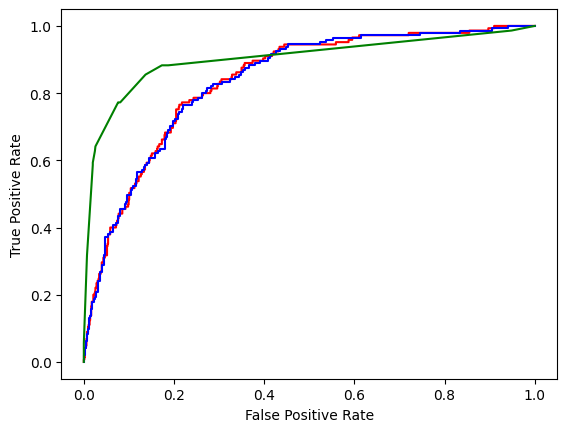

In [23]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

c = ['r', 'b', 'g']
for i, model in enumerate(models):
    predict = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, predict[:,1])
    plt.plot(fpr, tpr, c[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## feature importance

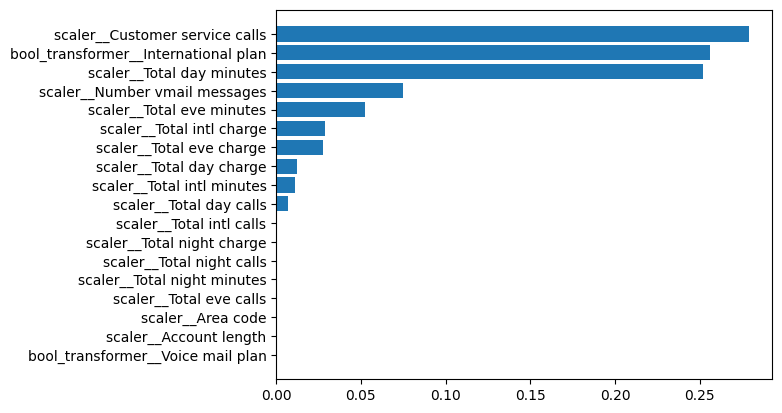

In [26]:
# DecisionTreeClassifier
importances_dtc = models[2].best_estimator_.named_steps['classifier'].feature_importances_
features_dtc = df_scaler.columns
dtc = np.c_[features_dtc, importances_dtc]
dtc_sort = dtc[dtc[:, 1].argsort()]
plt.barh(dtc_sort[:,0], dtc_sort[:,1]);

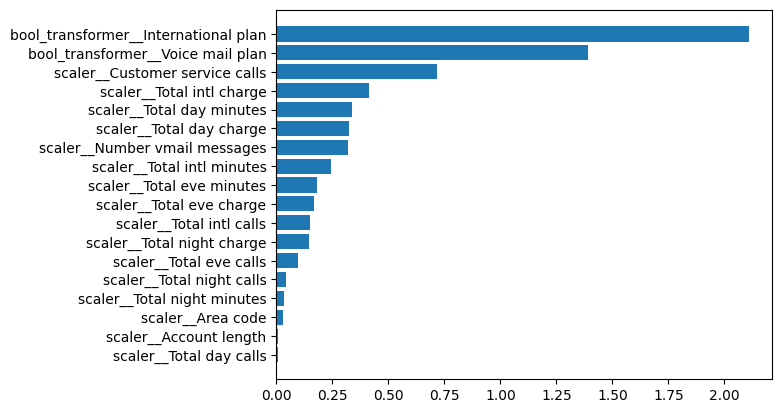

In [27]:
# SVC
importances_svc = np.absolute(models[0].best_estimator_.named_steps['classifier'].coef_[0])
features_svc = df_scaler.columns
svc = np.c_[features_svc, importances_svc]
svc_sort = svc[svc[:, 1].argsort()]
plt.barh(svc_sort[:,0], svc_sort[:,1]);